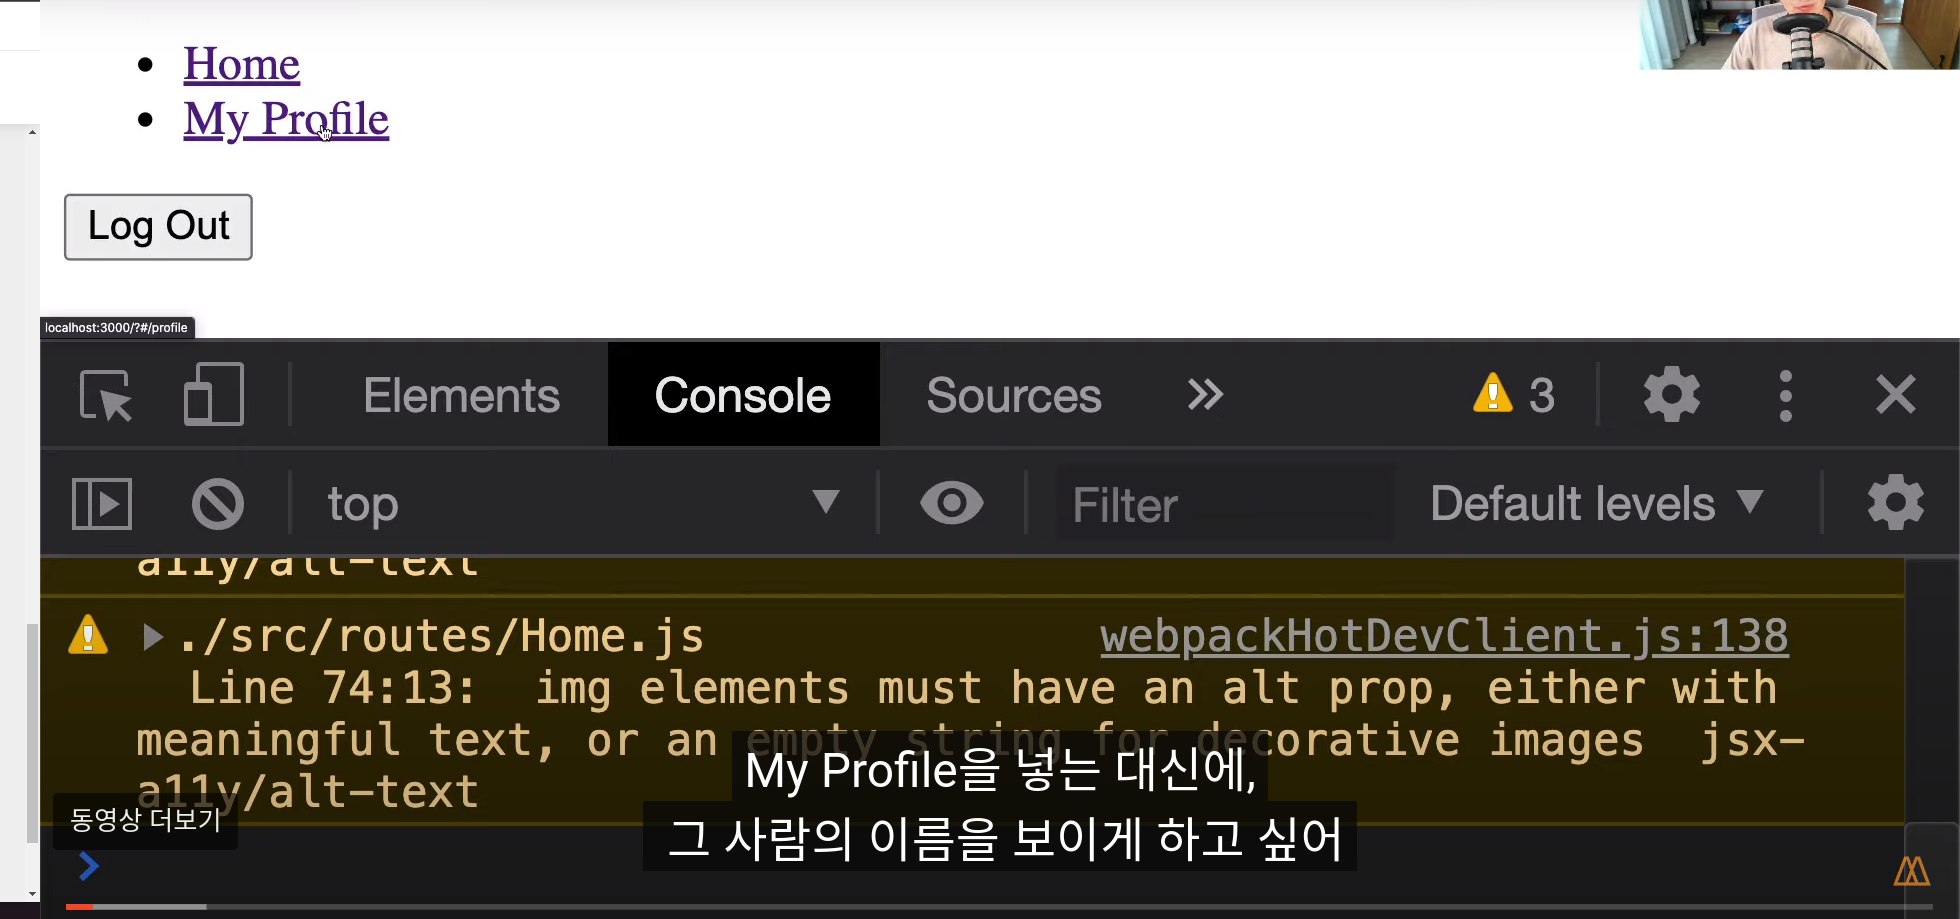

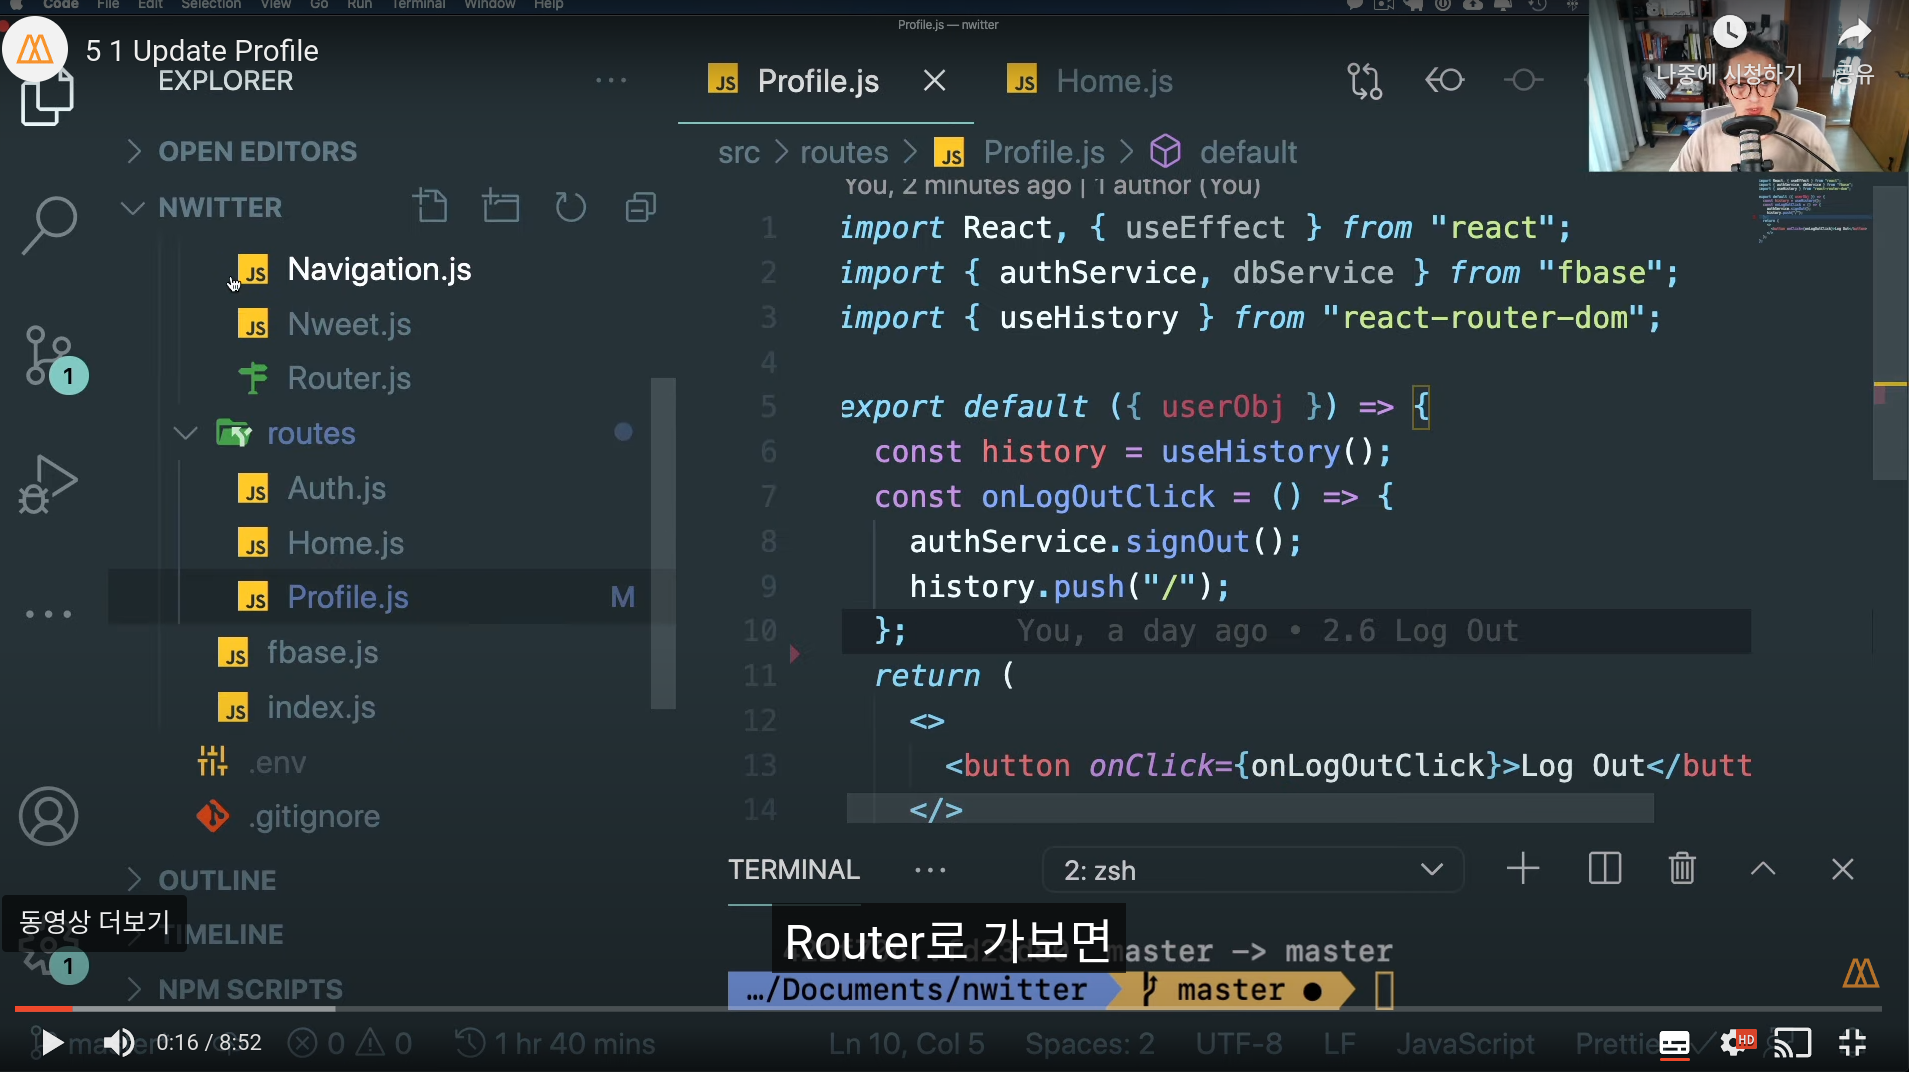

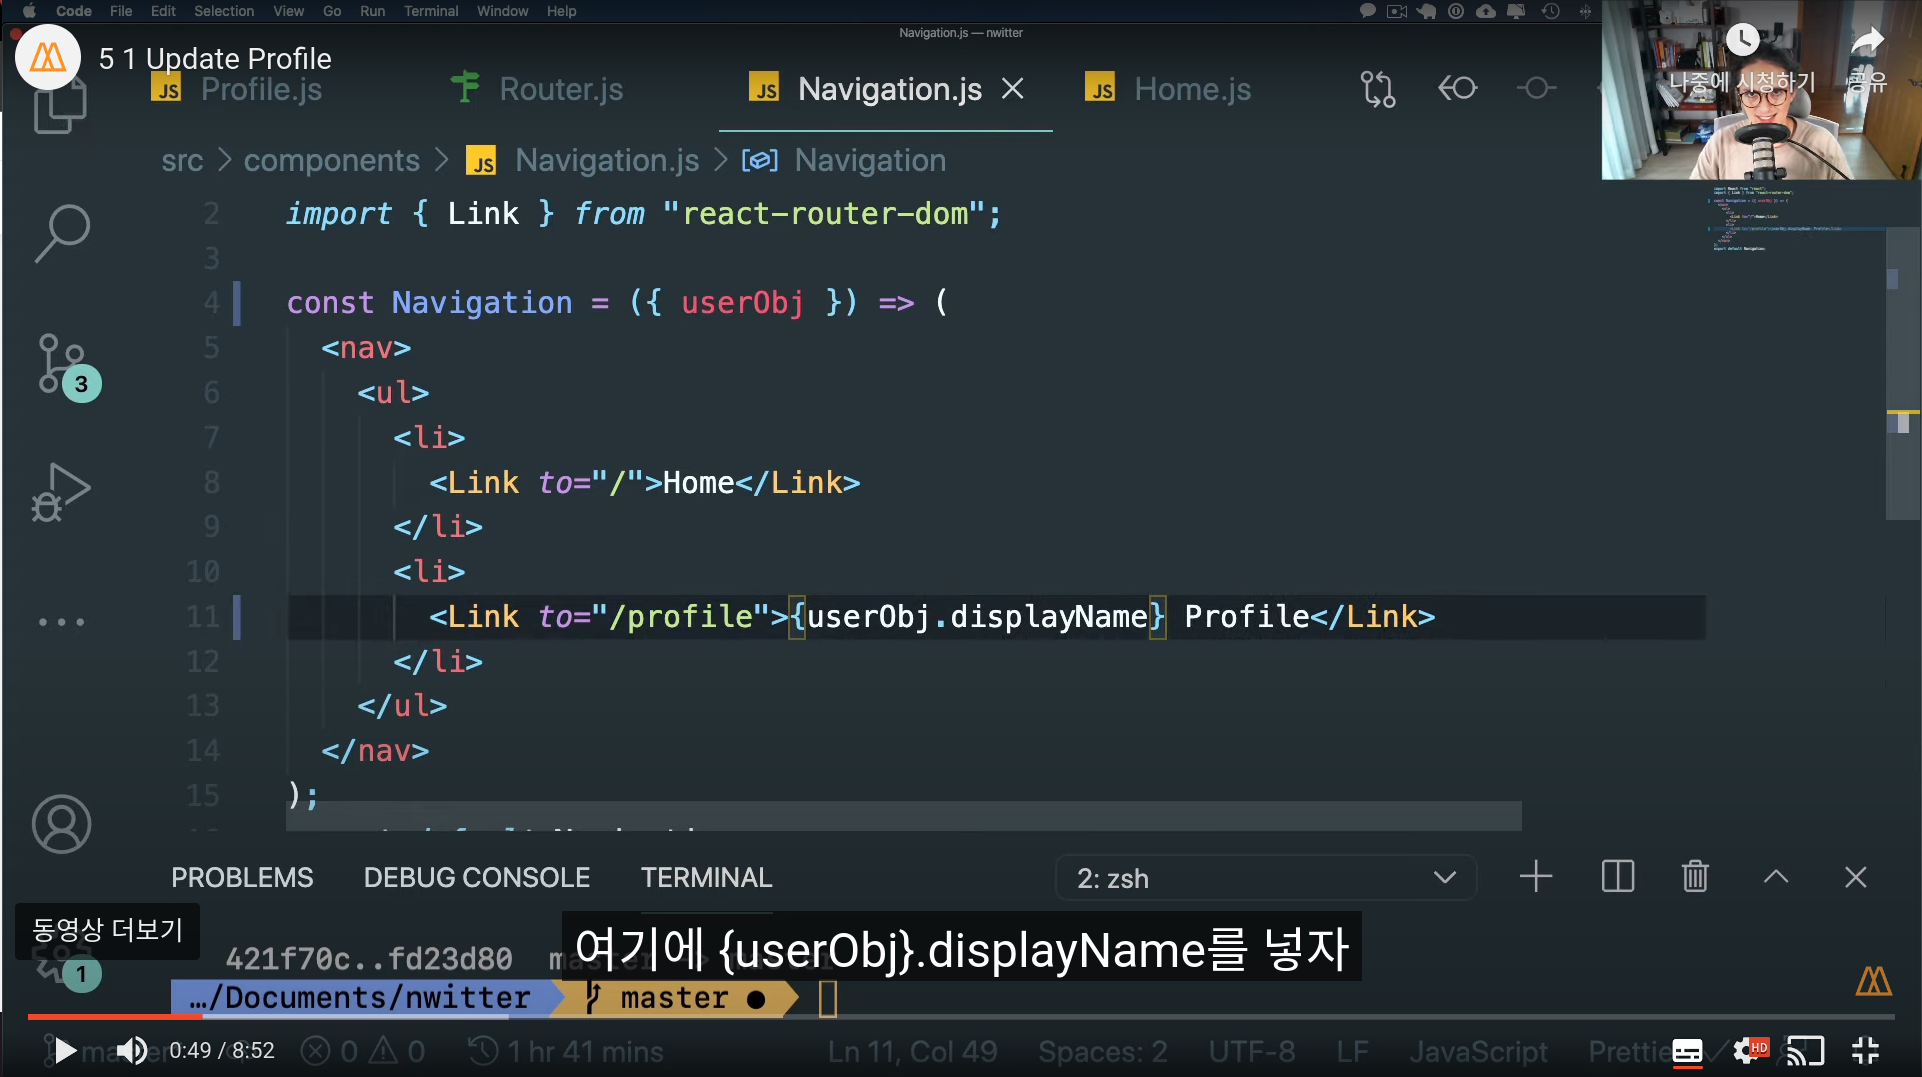

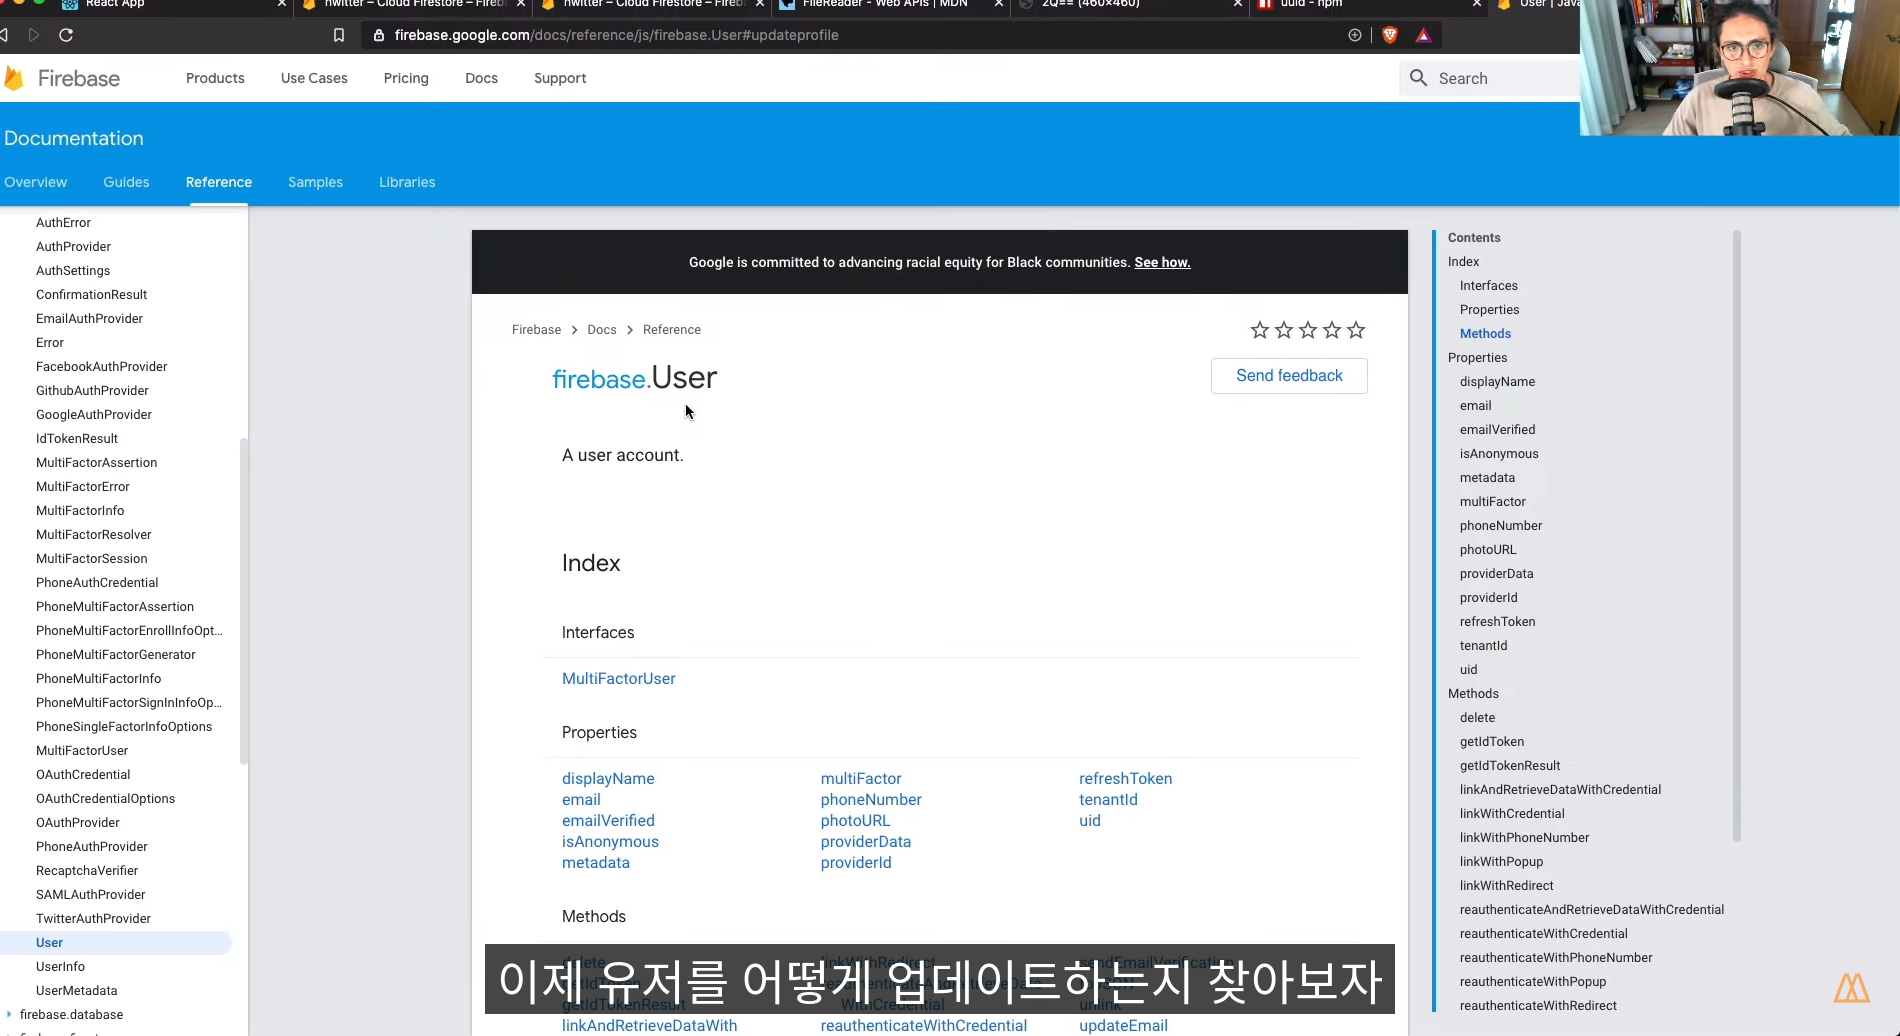

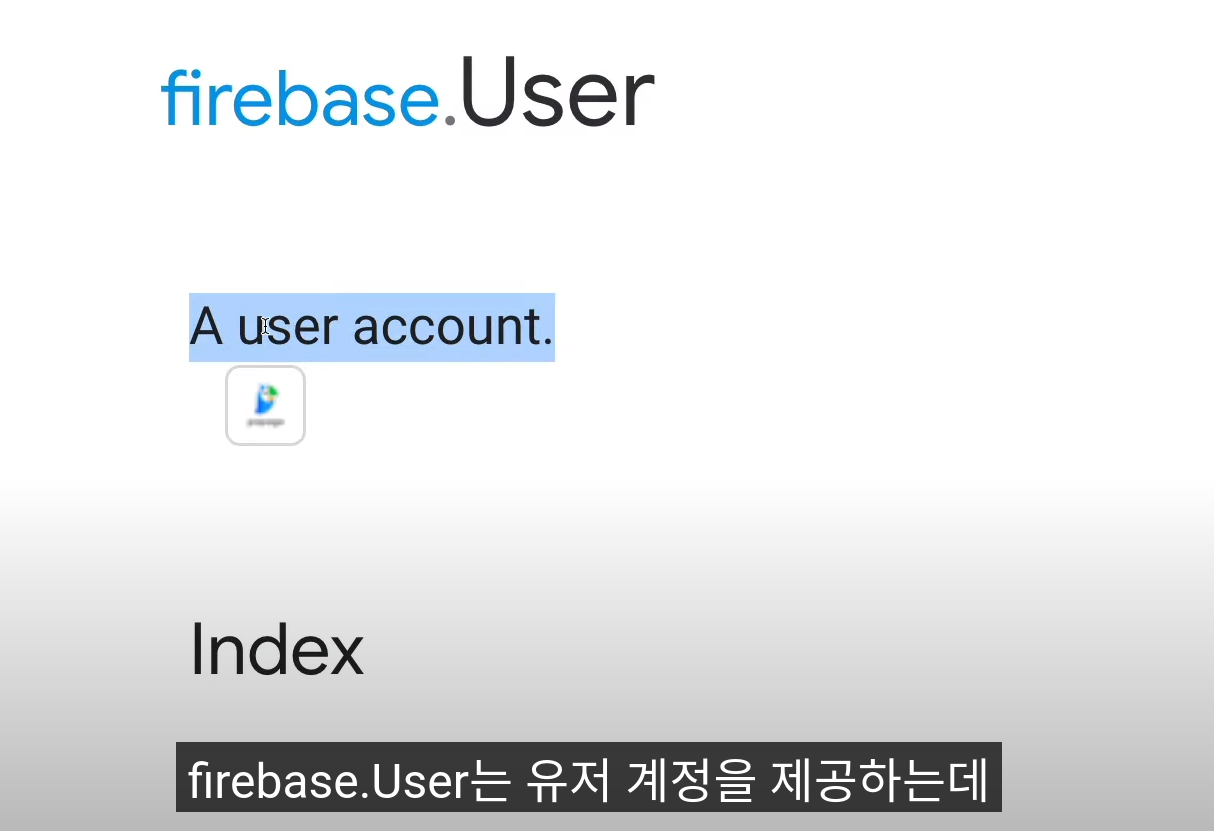

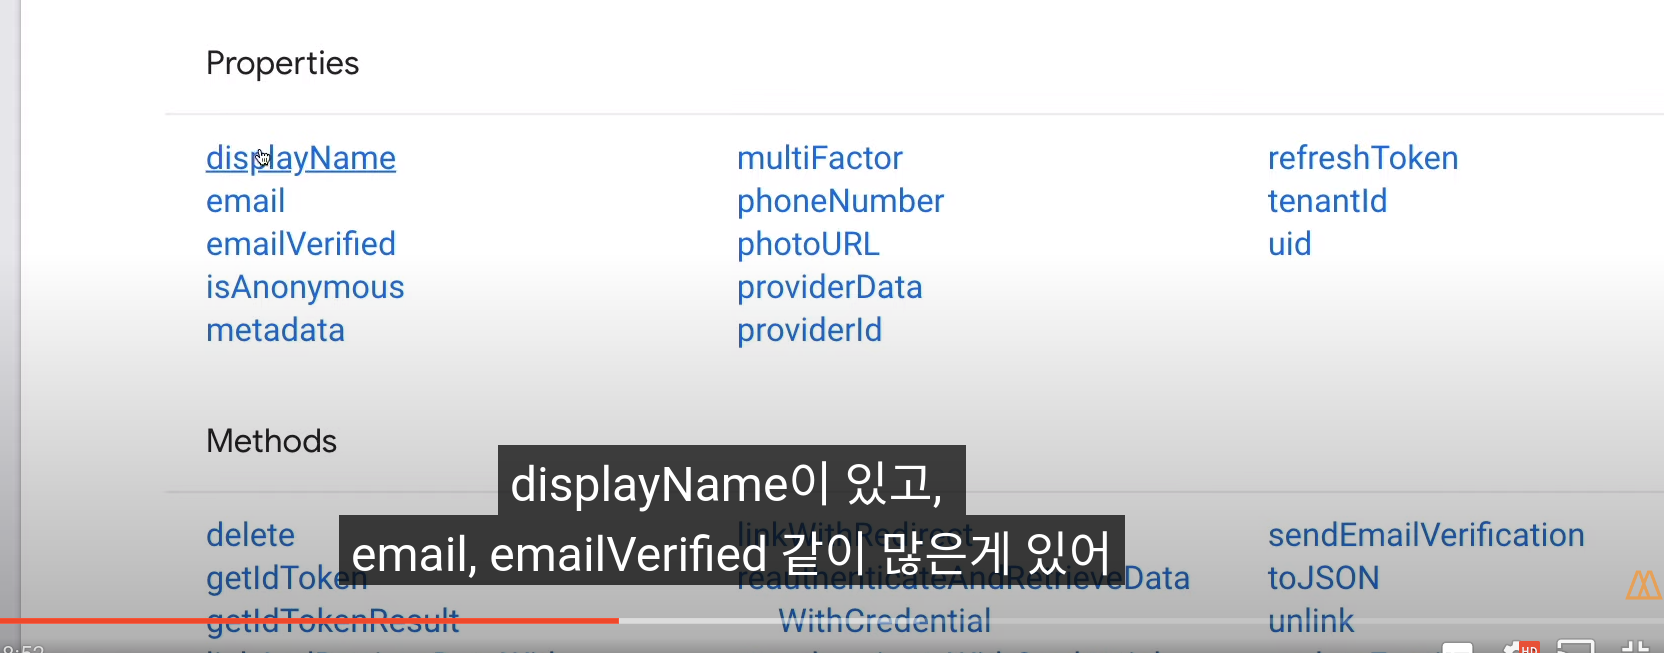

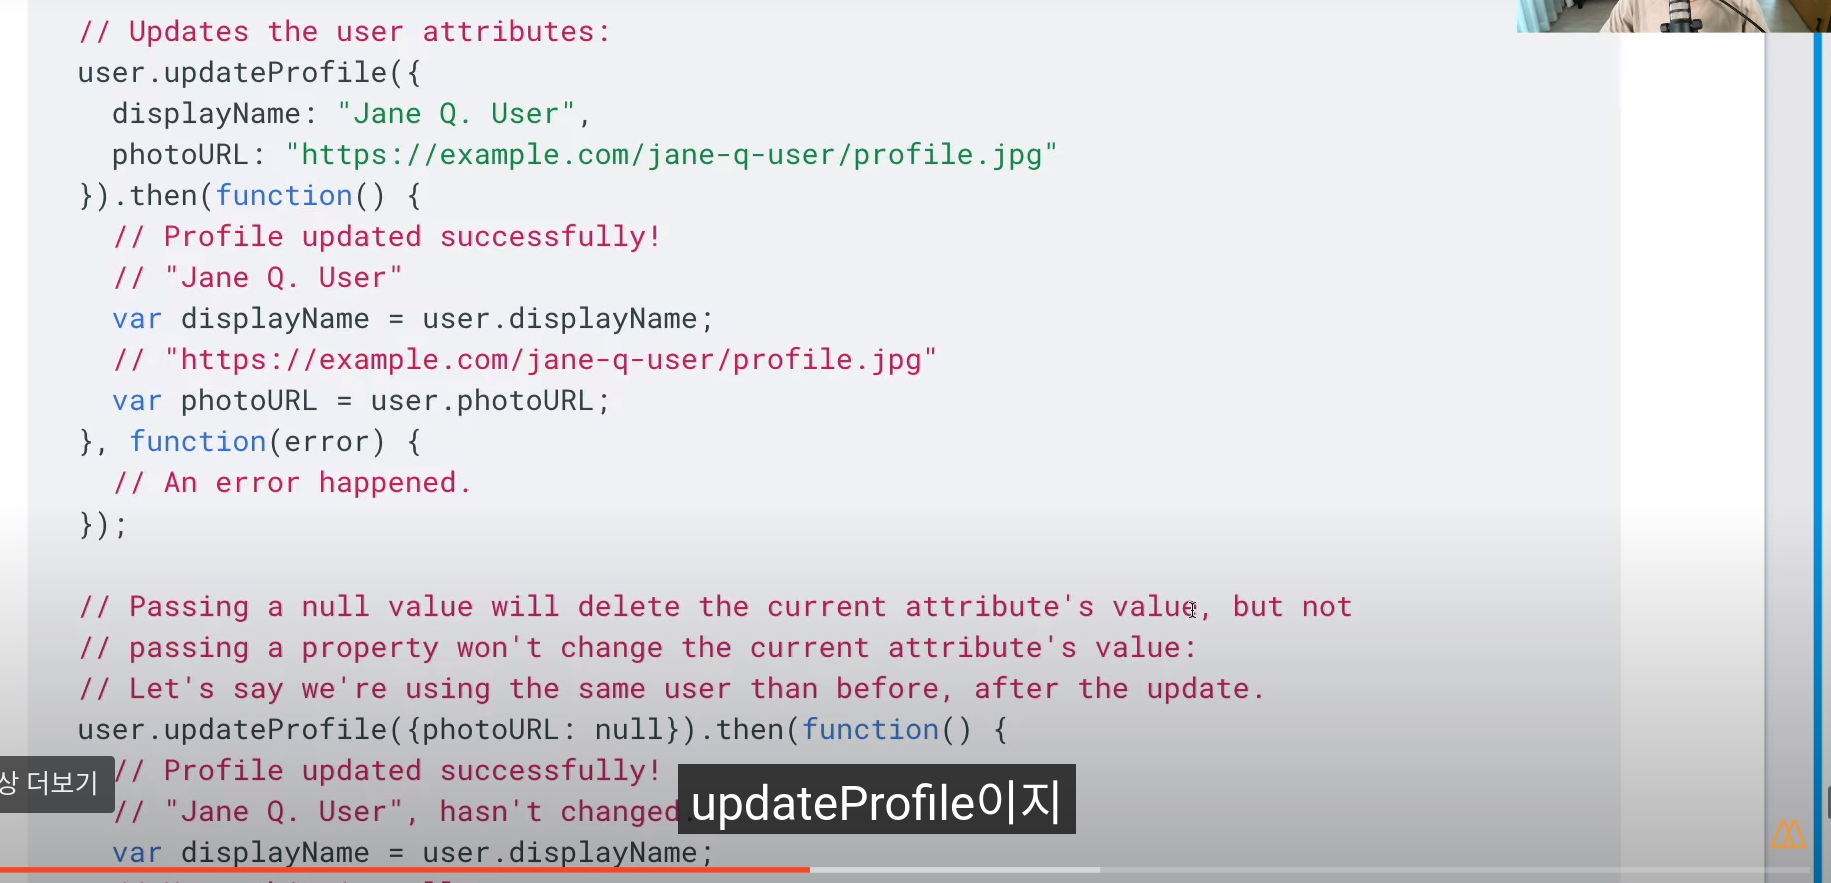

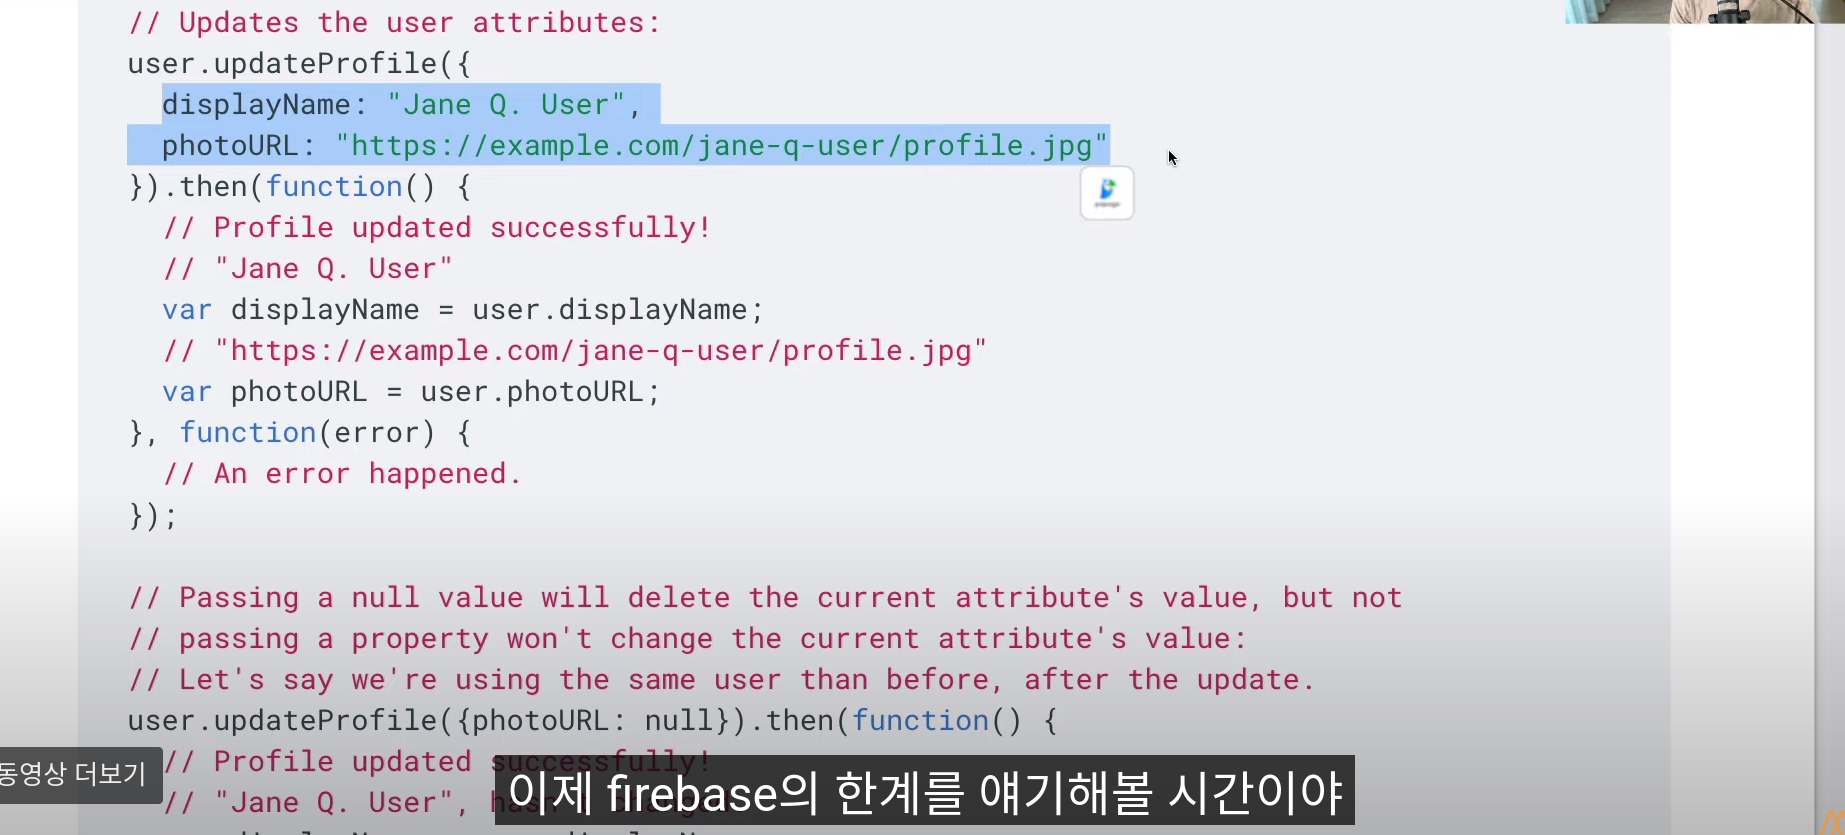

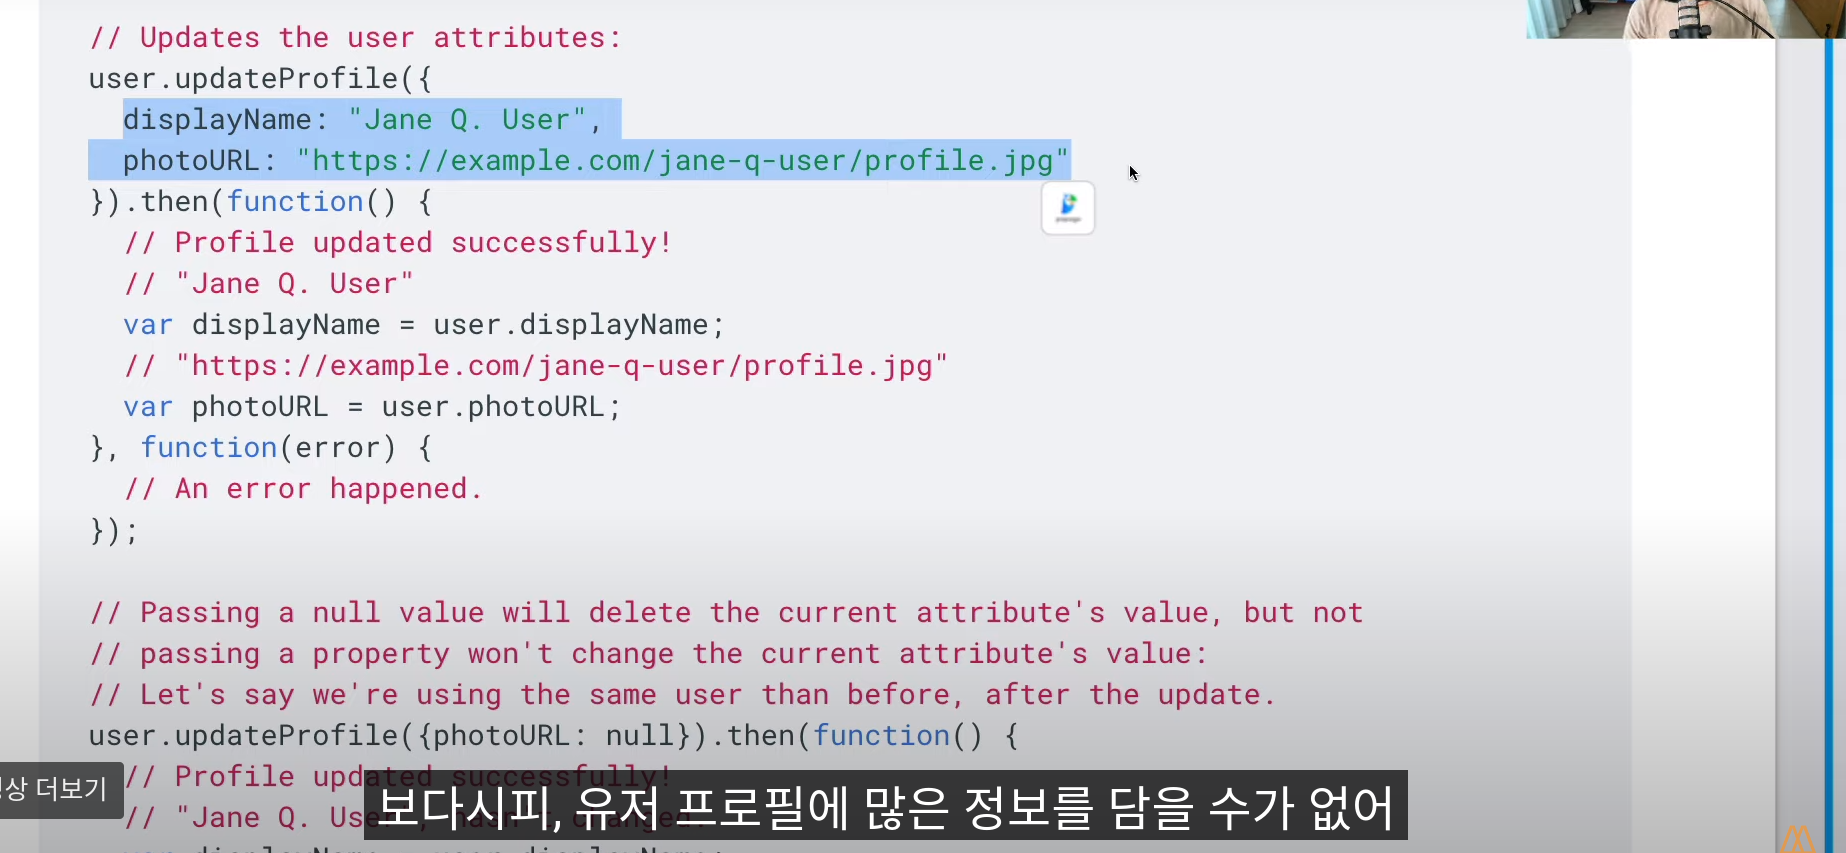

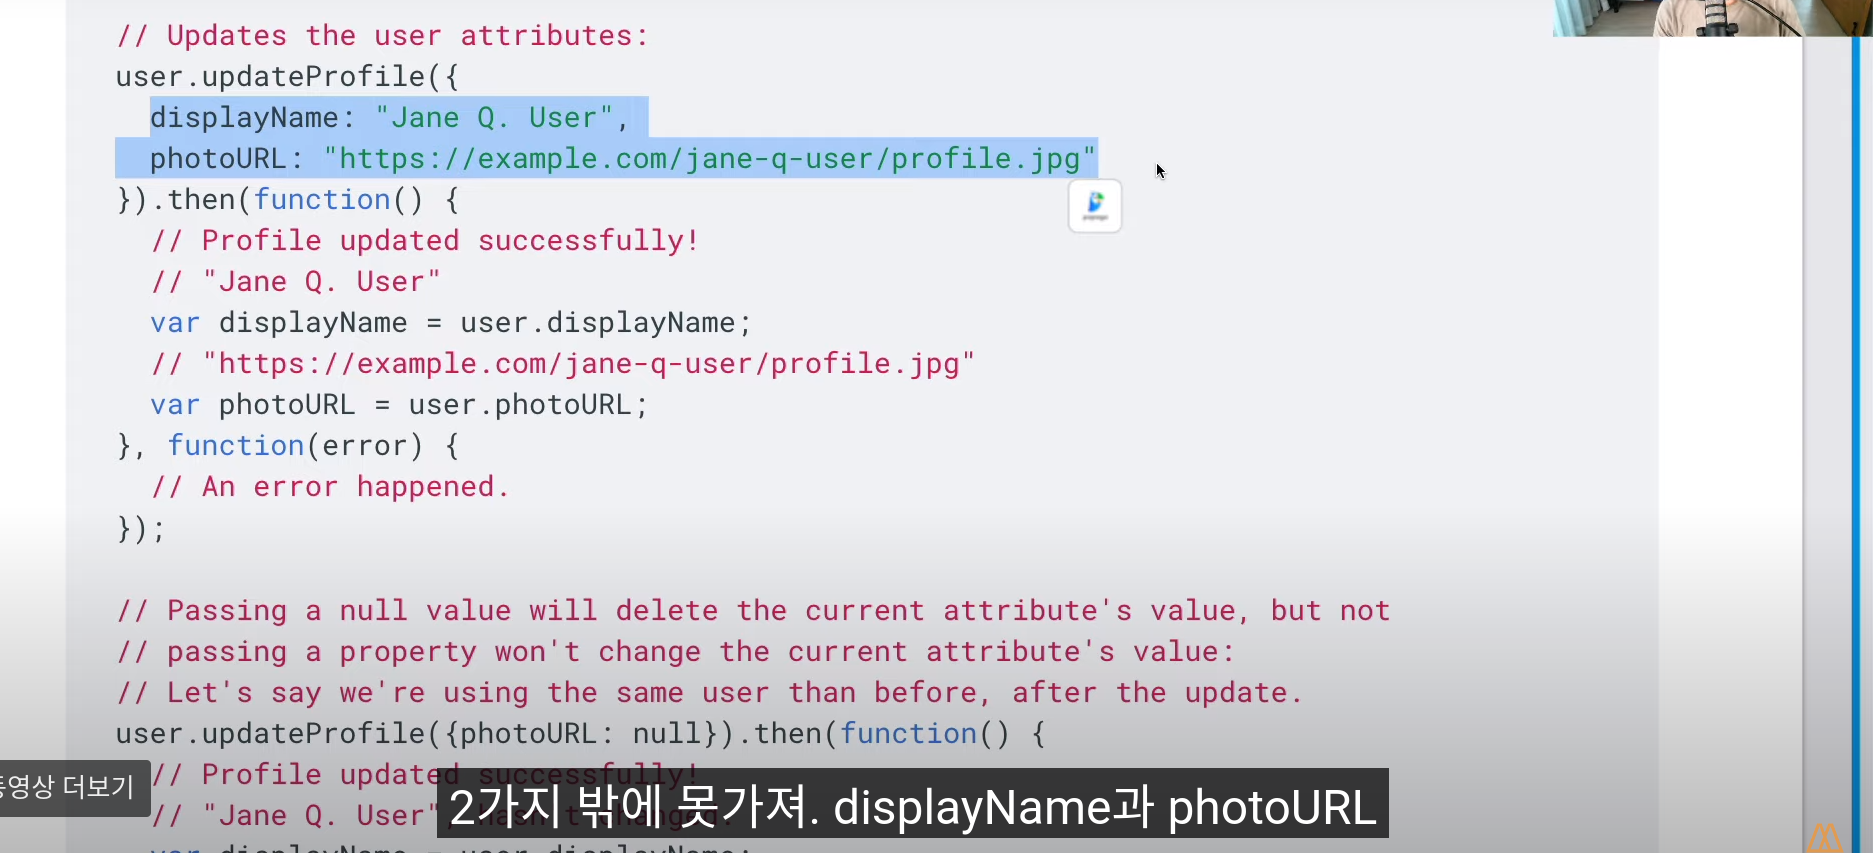

# Profile.js
```jsx
import { authService, dbService } from "fbase";

import { useNavigate } from "react-router-dom";
import { useEffect, useState } from "react";
import { collection, getDocs, orderBy, query, where } from "firebase/firestore";

import { updateProfile } from "@firebase/auth";

function Profile({ userObj }) {
  const navigate = useNavigate();
  const [newDisplayName, setNewDisplayName] = useState(userObj.displayName);

  const onLogOutClick = () => {
    authService.signOut();
    // 버그 발생 위치 : 로그아웃을 하여도 로그인상태로 유지되는 현상 발생
    // 해결방법 : App에 State로 관리 가능
    navigate("/");
  };

  const getMyJweets = async () => {
    const q = query(
      collection(dbService, "jweets"),
      where("creatorId", "==", `${userObj.uid}`),
      orderBy("createdAt", "desc")
    );

    const querySnapshot = await getDocs(q);
    querySnapshot.forEach((doc) => {
      console.log(doc.id, " => ", doc.data());
    });
  };

  useEffect(() => {
    getMyJweets();
  }, []);

  const onSubmit = async (event) => {
    event.preventDefault();
    if (userObj.displayName !== newDisplayName) {
      await updateProfile(userObj, { displayName: newDisplayName });
    }
  };

  const onChange = (event) => {
    const {
      target: { value },
    } = event;

    setNewDisplayName(value);
  };

  return (
    <>
      <form onSubmit={onSubmit}>
        <input
          type="text"
          placeholder="Display name"
          value={newDisplayName}
          onChange={onChange}
        />
        <input type="submit" value="Update Profile" />
      </form>
      <button onClick={onLogOutClick}>Log Out</button>
    </>
  );
}

export default Profile;

```